In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split 
pd.set_option('display.max_columns', None)

## Get basic information about the data

In [2]:
data = pd.read_csv('./home-credit-default-risk/application_train.csv')
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
data.columns[data.dtypes == object].unique()

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

#### See the missing value in every columns

C:\Users\hardi\AppData\Local\Temp\ipykernel_19236\3218340717.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.columns, rotation=90)


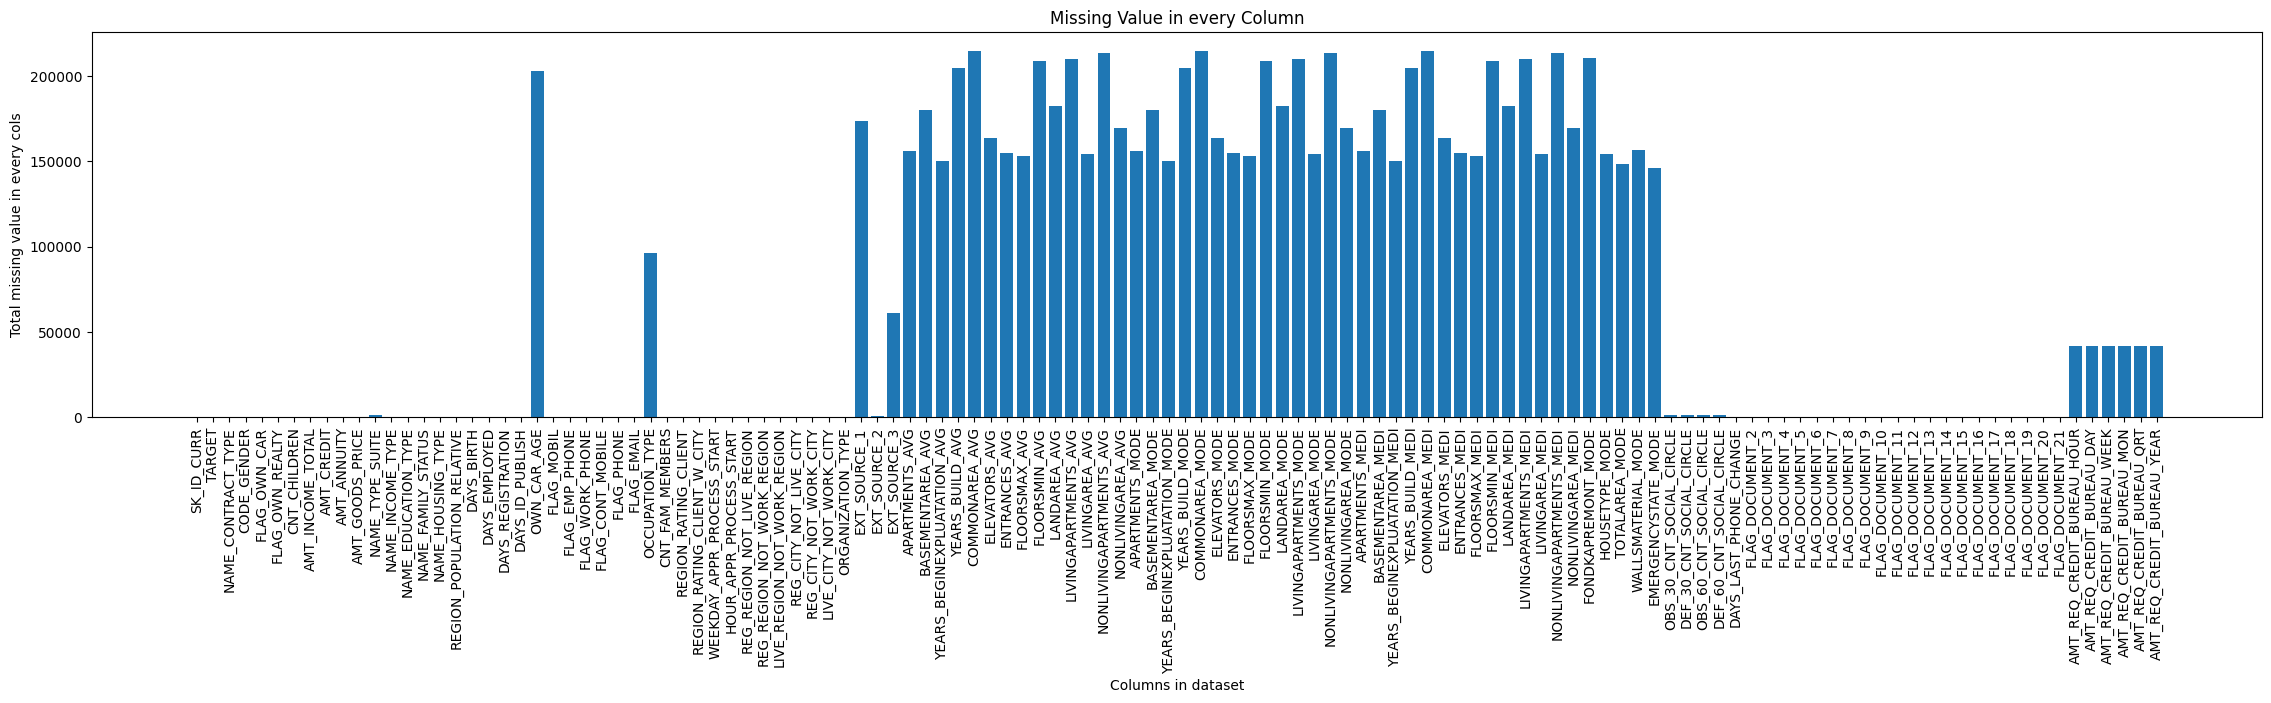

In [4]:
def missing_value_graph(x, y):
    fig, ax = plt.subplots(figsize=(28,5))
    ax.bar(x, y)
    ax.set_xticklabels(data.columns, rotation=90)
    ax.set_title("Missing Value in every Column")
    ax.set_xlabel('Columns in dataset')
    ax.set_ylabel('Total missing value in every cols')

missing_value_graph(data.columns, data.isna().sum())

#### Drop column that have more than 60% missing values

C:\Users\hardi\AppData\Local\Temp\ipykernel_19236\3218340717.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.columns, rotation=90)


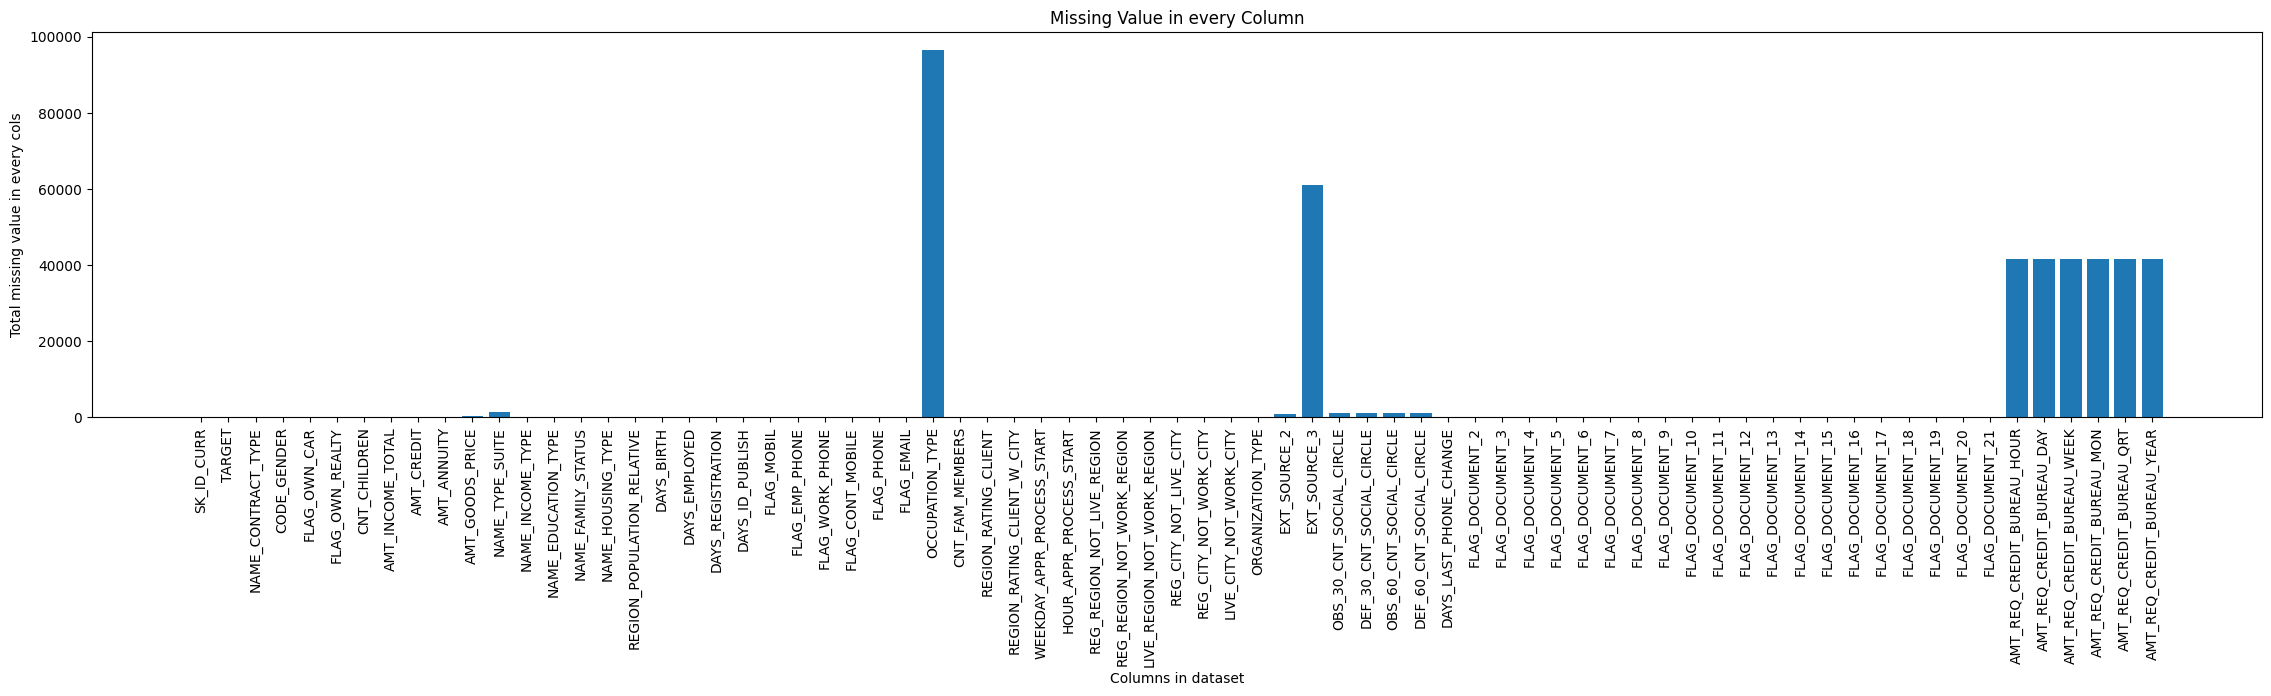

In [5]:
data = data.dropna(axis=1, thresh=0.6*len(data))
missing_value_graph(data.columns, data.isna().sum())

#### Fill the missing value in every column

In [6]:
data['OCCUPATION_TYPE'].fillna('Unknown', inplace = True)
data['NAME_TYPE_SUITE'].fillna('Unknown', inplace = True)

In [7]:
isna_numdata = ['AMT_GOODS_PRICE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 
                'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
                'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE']

for i in isna_numdata:
    data[i].fillna(data[i].mean(), inplace = True)

C:\Users\hardi\AppData\Local\Temp\ipykernel_19236\3218340717.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.columns, rotation=90)


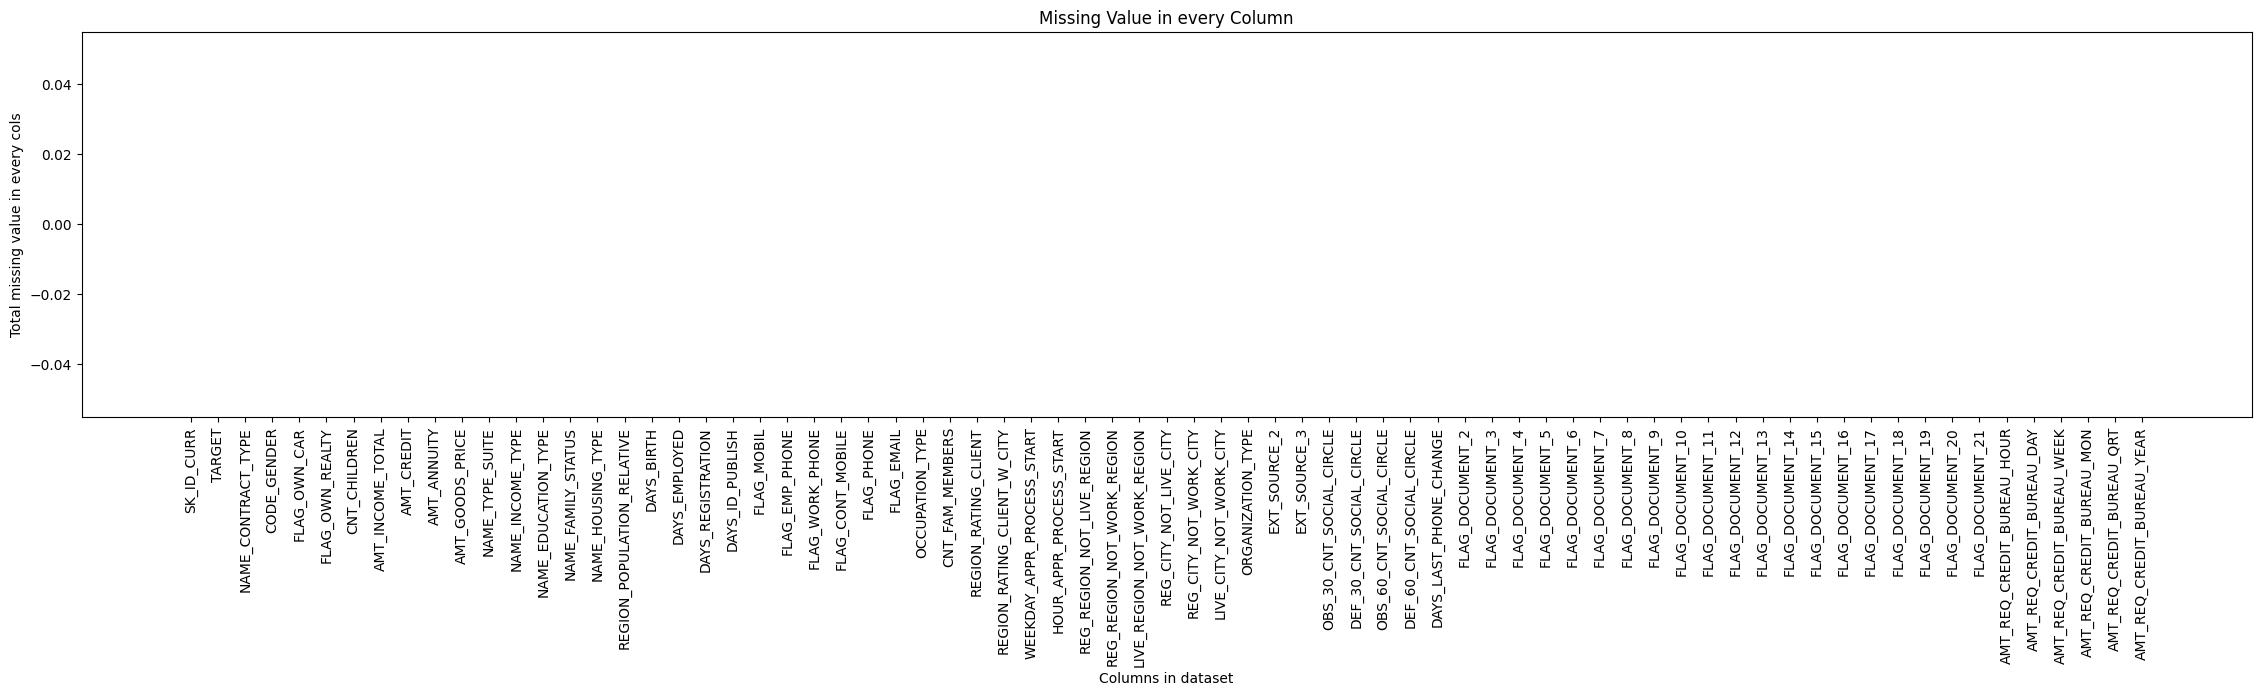

In [8]:
missing_value_graph(data.columns, data.isna().sum())

## Feature Selection

In [9]:
X = data.drop('TARGET', axis=1)
y = data['TARGET']
X_cat = X.select_dtypes(include='object')
X_num = X.select_dtypes(include='number')

In [10]:
for i in X_num.columns:
    X_num[i] = StandardScaler().fit_transform(X_num[i].values.reshape(len(X_num), 1))

In [11]:
fs = SelectKBest(score_func=f_classif, k=40)
fs.fit(X_num, y)
cols = fs.get_support(indices=True)
df_selected_features = X_num.iloc[:, cols]
df_selected_features.head()

,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR
0,-0.577538,-0.478095,-0.166149,-0.507465,-0.149452,1.506880,-0.456215,0.379837,0.579154,0.468697,-0.499013,1.599337,-1.265724,-0.103064,-0.062699,-0.631821,-0.124004,-0.231267,-0.291208,-0.547236,-0.467814,-1.317463,-2.129249,0.241033,4.163149,0.250314,5.253007,-0.206991,-0.006502,0.639065,-0.310738,-0.297632,-0.062538,-0.059477,-0.054269,-0.034802,-0.100138,-0.090534,-0.313873,-5.176655e-01
1,-0.577538,1.725450,0.592677,1.600698,-1.252750,-0.166821,-0.460115,1.078697,1.790855,0.468697,-0.499013,1.599337,-0.167639,-2.067573,-2.051813,-0.325620,-0.124004,-0.231267,-0.291208,-0.547236,-0.467814,0.565106,0.000000,-0.176156,-0.321603,-0.170589,-0.276616,0.163108,-0.006502,0.639065,-0.310738,-0.297632,-0.062538,-0.059477,-0.054269,-0.034802,-0.100138,-0.090534,-0.313873,-1.092866e+00
2,-0.577538,-1.152888,-1.404676,-1.092389,-0.783451,-0.689509,-0.453299,0.206116,0.306869,0.468697,2.003956,1.599337,-1.265724,-0.103064,-0.062699,-0.938022,-0.124004,-0.231267,-0.291208,-0.547236,-0.467814,0.217545,1.253633,-0.593345,-0.321603,-0.591491,-0.276616,0.178831,-0.006502,-1.564786,-0.310738,-0.297632,-0.062538,-0.059477,-0.054269,-0.034802,-0.100138,-0.090534,-0.313873,-1.092866e+00
3,-0.577538,-0.711430,0.177869,-0.653696,-0.928991,-0.680114,-0.473217,-1.375829,0.369143,0.468697,-0.499013,-0.625259,-0.167639,-0.103064,-0.062699,1.511587,-0.124004,-0.231267,-0.291208,-0.547236,-0.467814,0.712841,0.000000,0.241033,-0.321603,0.250314,-0.276616,0.418307,-0.006502,0.639065,-0.310738,-0.297632,-0.062538,-0.059477,-0.054269,-0.034802,-0.100138,-0.090534,0.000000,-3.831603e-16
4,-0.577538,-0.213734,-0.361755,-0.068772,0.563570,-0.892535,-0.473210,0.191639,-0.307263,0.468697,-0.499013,-0.625259,-1.265724,-0.103064,-0.062699,-0.325620,-0.124004,-0.231267,-0.291208,1.827367,2.137601,-1.004190,0.000000,-0.593345,-0.321603,-0.591491,-0.276616,-0.173126,-0.006502,-1.564786,-0.310738,3.359858,-0.062538,-0.059477,-0.054269,-0.034802,-0.100138,-0.090534,-0.313873,-1.092866e+00


In [12]:
df_selected_features.columns

Index(['CNT_CHILDREN', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_18', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='o

In [13]:
X_cat.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [14]:
data_new = data[['CNT_CHILDREN', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_18', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'TARGET']]
data_new.head()

,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,TARGET
0,0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,1,0,1,1.0,2,2,10,0,0,0,0,0,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0.000000,1.000000,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,1
1,0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,1,0,1,2.0,1,1,11,0,0,0,0,0,0.622246,0.510853,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0.000000,0.000000,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,0
2,0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1.0,2,2,9,0,0,0,0,0,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,0
3,0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,1,0,0,2.0,2,2,17,0,0,0,0,0,0.650442,0.510853,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0.267395,1.899974,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,0
4,0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,1,0,0,1.0,2,2,11,0,0,0,1,1,0.322738,0.510853,0.0,0.0,0.0,0.0,-1106.0,0,0,0,1,0,0,0,0,0,0,0.000000,0.000000,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,0


In [15]:
data_new.shape

(307511, 52)

In [16]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CNT_CHILDREN                 307511 non-null  int64  
 1   AMT_CREDIT                   307511 non-null  float64
 2   AMT_ANNUITY                  307511 non-null  float64
 3   AMT_GOODS_PRICE              307511 non-null  float64
 4   REGION_POPULATION_RELATIVE   307511 non-null  float64
 5   DAYS_BIRTH                   307511 non-null  int64  
 6   DAYS_EMPLOYED                307511 non-null  int64  
 7   DAYS_REGISTRATION            307511 non-null  float64
 8   DAYS_ID_PUBLISH              307511 non-null  int64  
 9   FLAG_EMP_PHONE               307511 non-null  int64  
 10  FLAG_WORK_PHONE              307511 non-null  int64  
 11  FLAG_PHONE                   307511 non-null  int64  
 12  CNT_FAM_MEMBERS              307511 non-null  float64
 13 

## Remove Redundant, Duplicated Data, Outlier in Data

In [17]:
numerical_data = data_new[data_new.columns[data_new.dtypes != object]]
numerical_data.columns.unique()

Index(['CNT_CHILDREN', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_18', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'TARGET'],
    

C:\Users\hardi\AppData\Local\Temp\ipykernel_19236\4039648581.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_new.corr(), annot=True, cmap='coolwarm')


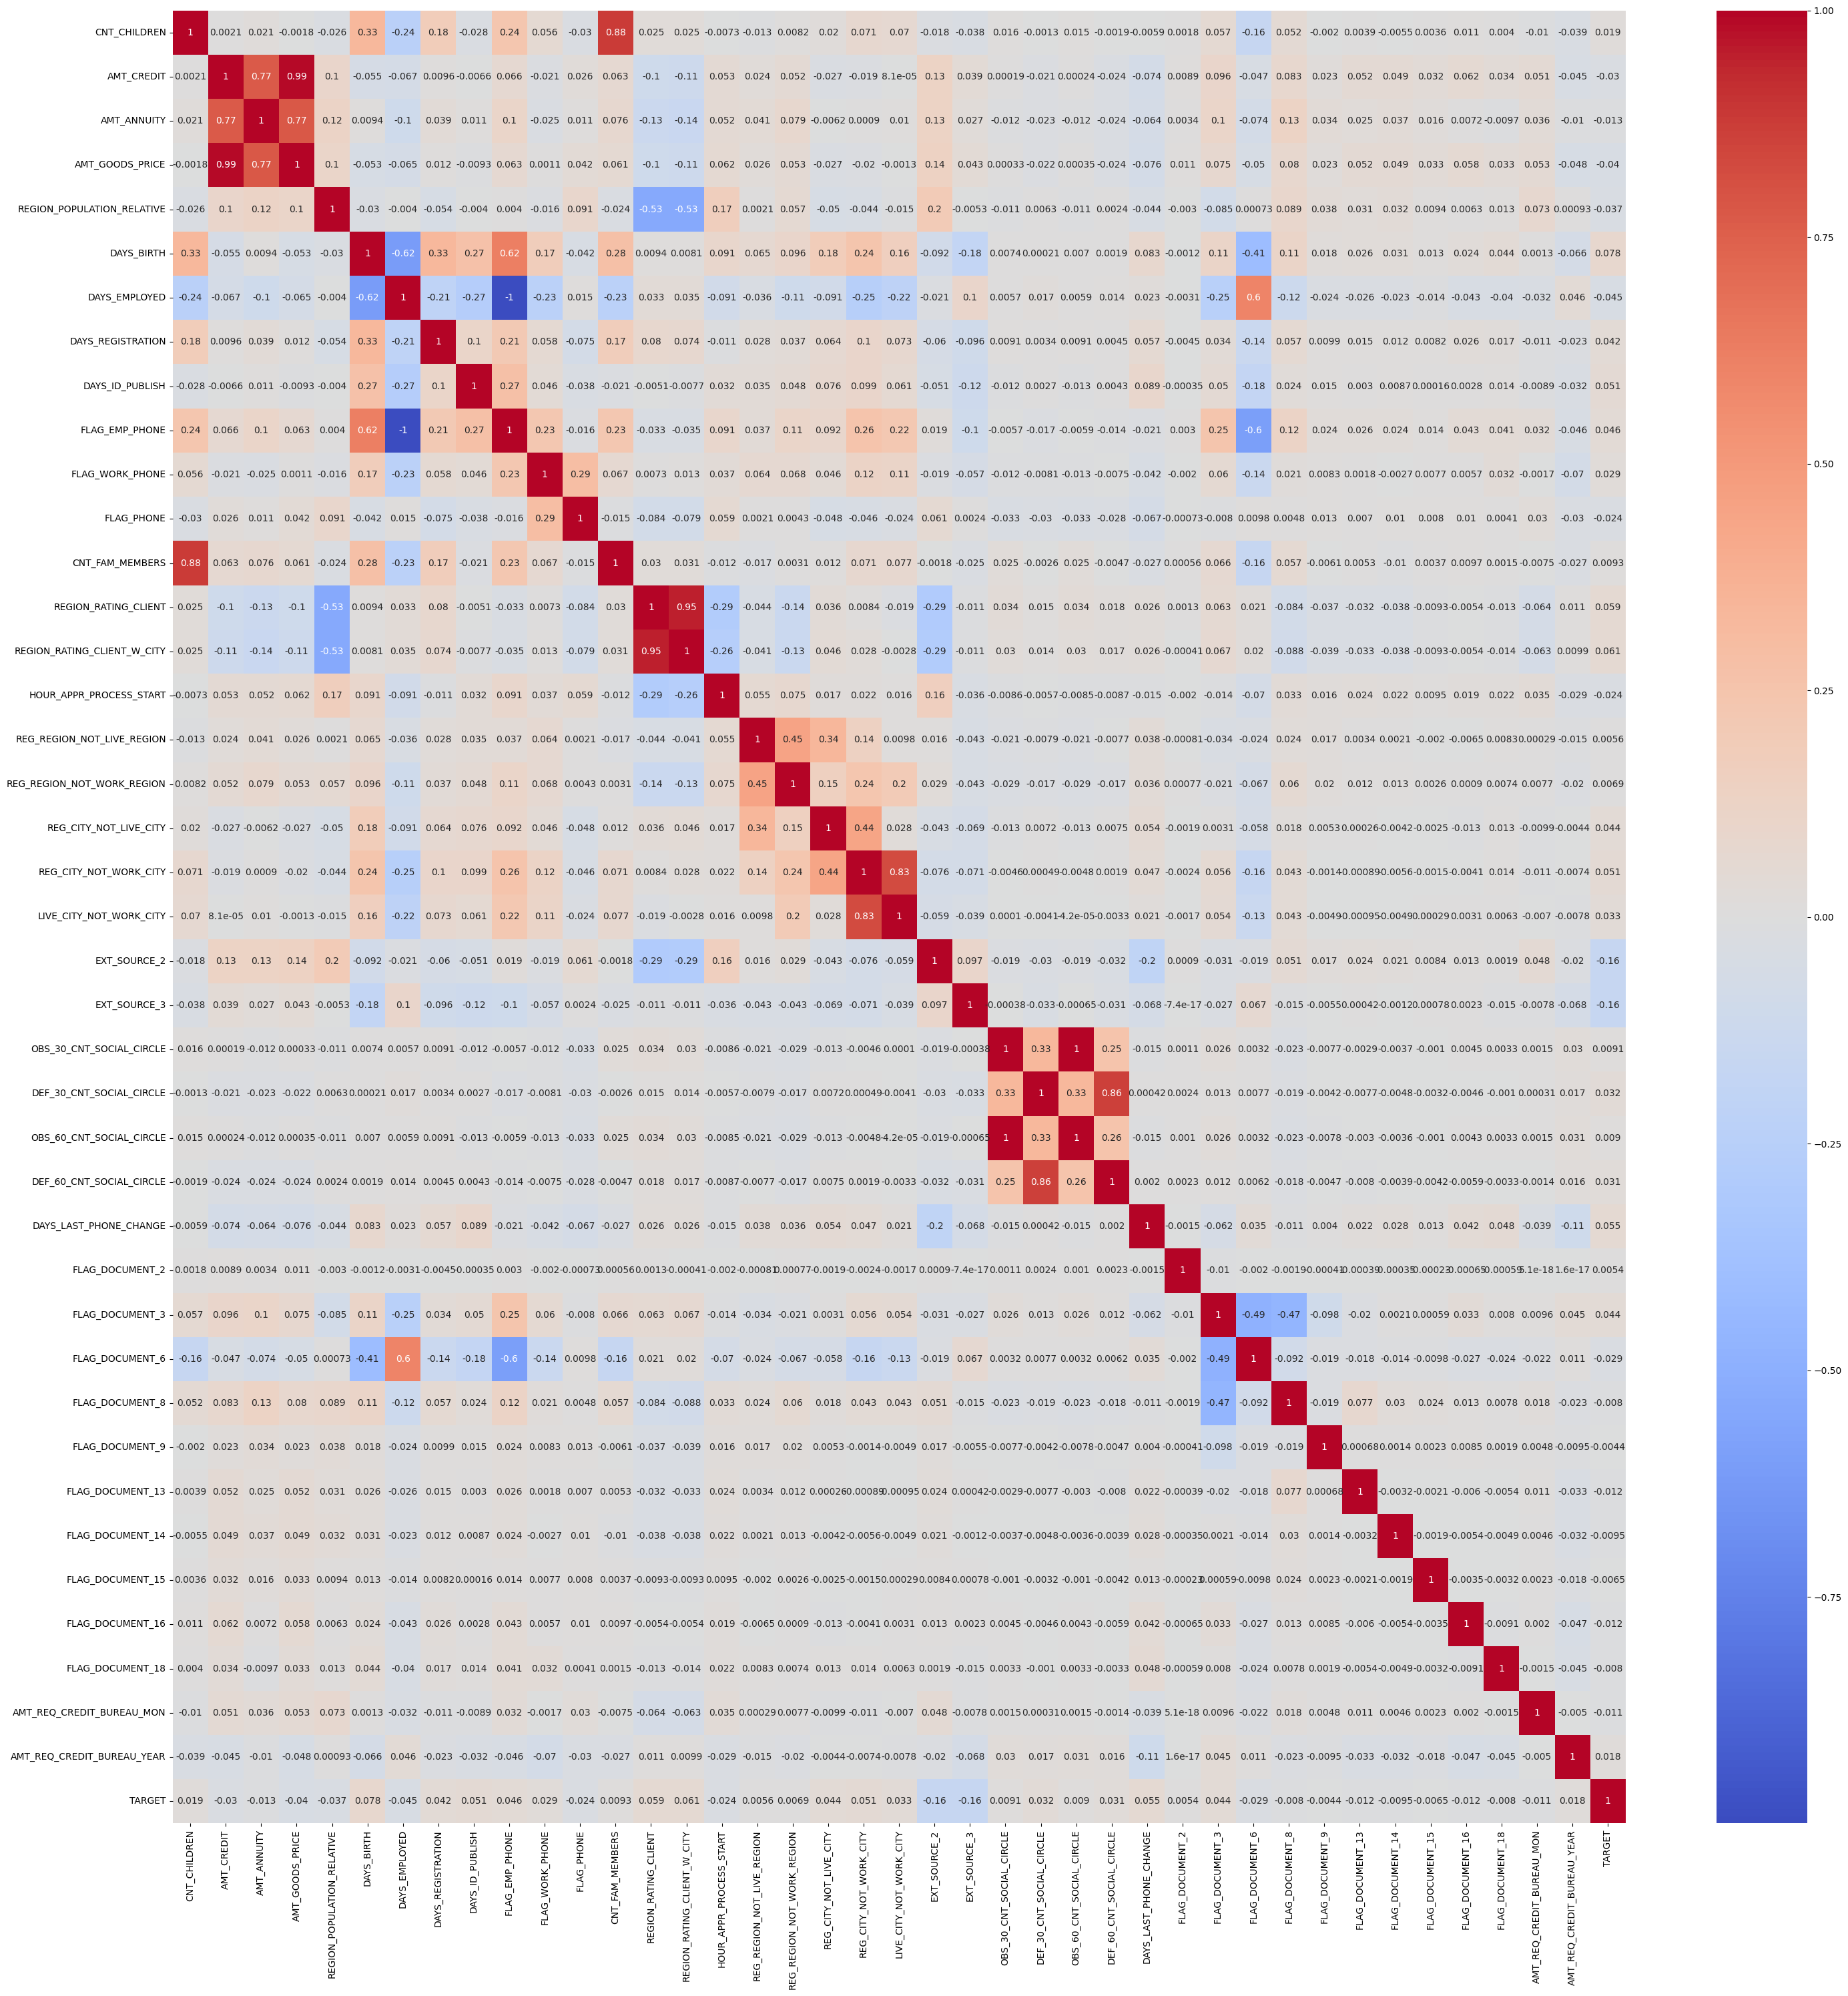

In [18]:
## See the correlation matrix between columns

plt.figure(figsize=(30, 30))
sns.heatmap(data_new.corr(), annot=True, cmap='coolwarm')
plt.tight_layout()
plt.show()

In [19]:
drop_redundan = ['CNT_FAM_MEMBERS','AMT_CREDIT', 'REGION_RATING_CLIENT_W_CITY', 'FLAG_EMP_PHONE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY']
drop_not_needed_data = ['WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'OCCUPATION_TYPE', 'NAME_TYPE_SUITE']
data_new = data_new.drop(drop_redundan, axis=1)
data_new = data_new.drop(drop_not_needed_data, axis=1)

#### Outlier

In [20]:
z_score = np.abs(zscore(data_new[data_new.columns[data_new.dtypes != object]]))
threshold = 3.75
outliers = np.where(z_score > threshold)

cleared_data = data_new[(z_score < threshold).all(axis=1)]

In [21]:
print(f"Before clean outlier: {len(data_new)}")
print(f"After clean outlier: {len(cleared_data)}")

Before clean outlier: 307511
After clean outlier: 267937


In [22]:
cleared_data.drop_duplicates()

,CNT_CHILDREN,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,FLAG_PHONE,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,TARGET
1,0,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,0,1,1,11,0,0,0,0,0.622246,0.510853,1.0,0.0,1.0,-828.0,0,1,0,0,0,0,0,0,0,0,0.000000,0.000000,F,N,N,State servant,Higher education,Married,House / apartment,0
2,0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,1,1,2,9,0,0,0,0,0.555912,0.729567,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,M,Y,Y,Working,Secondary / secondary special,Single / not married,House / apartment,0
3,0,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,0,0,2,17,0,0,0,0,0.650442,0.510853,2.0,0.0,2.0,-617.0,0,1,0,0,0,0,0,0,0,0,0.267395,1.899974,F,N,Y,Working,Secondary / secondary special,Civil marriage,House / apartment,0
4,0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,0,0,2,11,0,0,0,1,0.322738,0.510853,0.0,0.0,0.0,-1106.0,0,0,0,1,0,0,0,0,0,0,0.000000,0.000000,M,N,Y,Working,Secondary / secondary special,Single / not married,House / apartment,0
5,0,27517.5,454500.0,0.035792,-16941,-1588,-4970.0,-477,1,1,2,16,0,0,0,0,0.354225,0.621226,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0.000000,1.000000,M,N,Y,State servant,Secondary / secondary special,Married,House / apartment,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,27558.0,225000.0,0.032561,-9327,-236,-8456.0,-1982,0,0,1,15,0,0,0,0,0.681632,0.510853,0.0,0.0,0.0,-273.0,0,0,0,1,0,0,0,0,0,0,0.267395,1.899974,M,N,N,Working,Secondary / secondary special,Separated,With parents,0
307507,0,12001.5,225000.0,0.025164,-20775,365243,-4388.0,-4090,0,1,2,8,0,0,0,0,0.115992,0.510853,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0.267395,1.899974,F,N,Y,Pensioner,Secondary / secondary special,Widow,House / apartment,0
307508,0,29979.0,585000.0,0.005002,-14966,-7921,-6737.0,-5150,0,0,3,9,0,0,0,1,0.535722,0.218859,6.0,0.0,6.0,-1909.0,0,1,0,0,0,0,0,0,0,0,1.000000,1.000000,F,N,Y,Working,Higher education,Separated,House / apartment,0
307509,0,20205.0,319500.0,0.005313,-11961,-4786,-2562.0,-931,0,0,2,9,0,0,1,1,0.514163,0.661024,0.0,0.0,0.0,-322.0,0,1,0,0,0,0,0,0,0,0,0.000000,0.000000,F,N,Y,Commercial associate,Secondary / secondary special,Married,House / apartment,1


## Get insight over data

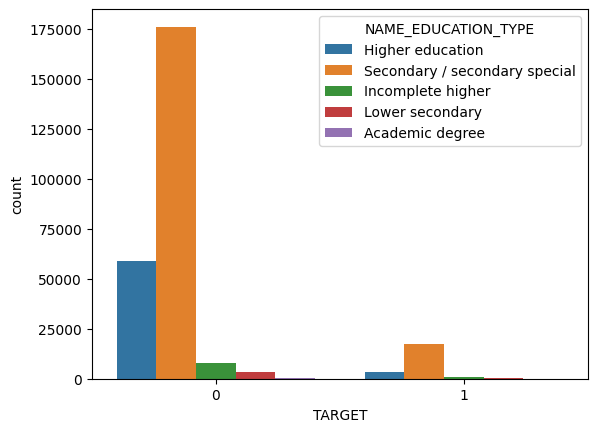

In [50]:
sns.countplot(x='TARGET',hue='NAME_EDUCATION_TYPE',data=cleared_data)
plt.show()

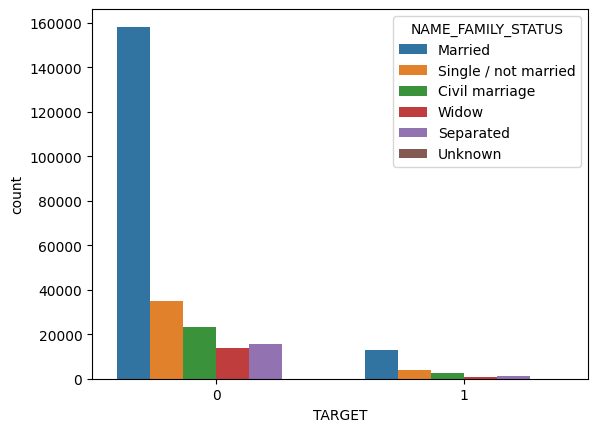

In [53]:
sns.countplot(x='TARGET',hue='NAME_FAMILY_STATUS',data=cleared_data)
plt.show()

<Axes: xlabel='TARGET', ylabel='count'>

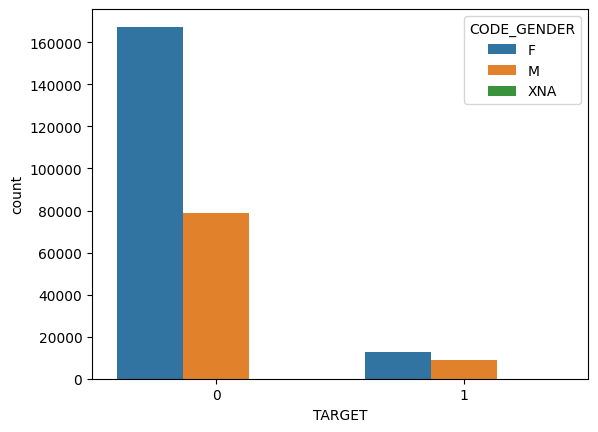

In [55]:
sns.countplot(x='TARGET',hue='CODE_GENDER',data=cleared_data)

<Axes: xlabel='TARGET', ylabel='count'>

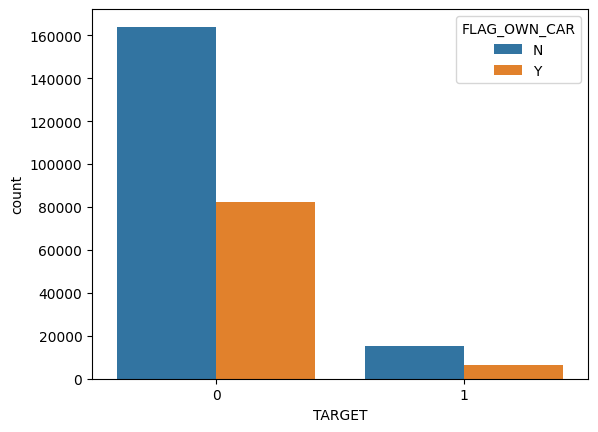

In [56]:
sns.countplot(x='TARGET',hue='FLAG_OWN_CAR',data=cleared_data)

<Axes: xlabel='TARGET', ylabel='count'>

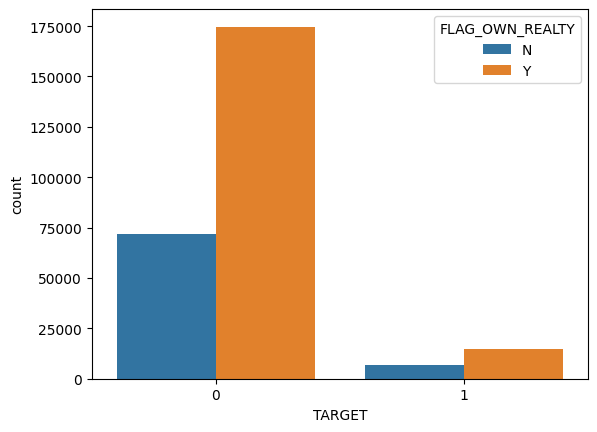

In [57]:
sns.countplot(x='TARGET',hue='FLAG_OWN_REALTY',data=cleared_data)

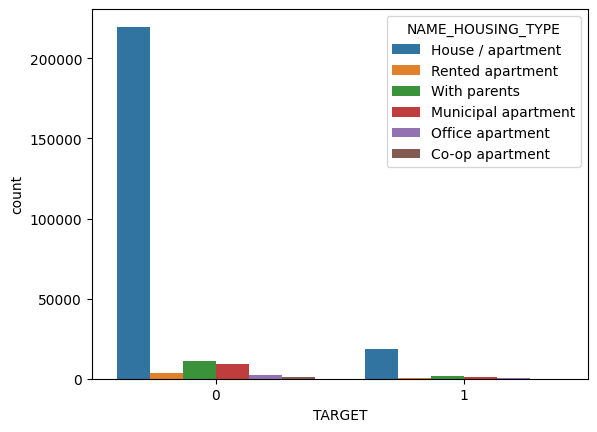

In [58]:
sns.countplot(x='TARGET',hue='NAME_HOUSING_TYPE',data=cleared_data)
plt.show()

#### See the Unique value for Categorical Columns to make decision for choosing right encoding

In [23]:
cleared_data.columns[cleared_data.dtypes == 'object'].unique()

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE'],
      dtype='object')

In [24]:
cleared_data['CODE_GENDER'].unique() 

array(['F', 'M', 'XNA'], dtype=object)

In [25]:
cleared_data['FLAG_OWN_CAR'].unique()

array(['N', 'Y'], dtype=object)

In [26]:
cleared_data['FLAG_OWN_REALTY'].unique()

array(['N', 'Y'], dtype=object)

In [27]:
cleared_data['NAME_INCOME_TYPE'].unique()

array(['State servant', 'Working', 'Pensioner', 'Commercial associate',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

In [28]:
cleared_data['NAME_EDUCATION_TYPE'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [29]:
cleared_data['NAME_FAMILY_STATUS'].unique()

array(['Married', 'Single / not married', 'Civil marriage', 'Widow',
       'Separated', 'Unknown'], dtype=object)

In [30]:
cleared_data['NAME_HOUSING_TYPE'].unique()

array(['House / apartment', 'Rented apartment', 'With parents',
       'Municipal apartment', 'Office apartment', 'Co-op apartment'],
      dtype=object)

In [31]:
cleared_data['TARGET'].unique()

array([0, 1], dtype=int64)

## Encoding Feature Categorical Data

In [32]:
## Split the dataset into train & test

X = cleared_data.drop('TARGET', axis=1)
y = cleared_data['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f'Shape of X_train : {X_train.shape}')
print(f'Shape of X_test : {X_test.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of y_test : {y_test.shape}')

Shape of X_train : (200952, 41)
Shape of X_test : (66985, 41)
Shape of y_train : (200952,)
Shape of y_test : (66985,)


In [33]:
map_CODE_GENDER = {'XNA' : 0, 'F' : 1, 'M' : 2}
map_FLAG_OWN_CAR = {'N':0,'Y':1}
map_FLAG_OWN_REALTY = {'N':0,'Y':1}
map_NAME_INCOME_TYPE = {'Unemployed':0,'Maternity leave':1,'Pensioner':2,'Student':3,
                       'Working':4,'State servant':5,'Commercial associate':6,'Businessman':7}
map_NAME_EDUCATION_TYPE = {'Lower secondary' : 0, 'Secondary / secondary special' : 1, 'Incomplete higher' : 2, 'Higher education' : 3  
       , 'Academic degree' : 4}
map_NAME_FAMILY_STATUS = {'Unknown':0, 'Civil marriage' : 1, 'Widow': 2, 'Separated' : 3, 'Single / not married' : 4, 'Married' : 5}
map_NAME_HOUSING_TYPE ={'Co-op apartment' : 0, 'Office apartment' : 1, 'Rented apartment' : 2, 'Municipal apartment' : 3, 'With parents' :4, 'House / apartment': 5}

X_train['CODE_GENDER'] = X_train['CODE_GENDER'].map(map_CODE_GENDER)
X_train['FLAG_OWN_CAR'] = X_train['FLAG_OWN_CAR'].map(map_FLAG_OWN_CAR)
X_train['FLAG_OWN_REALTY'] = X_train['FLAG_OWN_REALTY'].map(map_FLAG_OWN_REALTY)
X_train['NAME_EDUCATION_TYPE'] = X_train['NAME_EDUCATION_TYPE'].map(map_NAME_EDUCATION_TYPE)
X_train['NAME_INCOME_TYPE'] = X_train['NAME_INCOME_TYPE'].map(map_NAME_INCOME_TYPE)
X_train['NAME_FAMILY_STATUS'] = X_train['NAME_FAMILY_STATUS'].map(map_NAME_FAMILY_STATUS)
X_train['NAME_HOUSING_TYPE'] = X_train['NAME_HOUSING_TYPE'].map(map_NAME_HOUSING_TYPE)

X_test['CODE_GENDER'] = X_test['CODE_GENDER'].map(map_CODE_GENDER)
X_test['FLAG_OWN_CAR'] = X_test['FLAG_OWN_CAR'].map(map_FLAG_OWN_CAR)
X_test['FLAG_OWN_REALTY'] = X_test['FLAG_OWN_REALTY'].map(map_FLAG_OWN_REALTY)
X_test['NAME_EDUCATION_TYPE'] = X_test['NAME_EDUCATION_TYPE'].map(map_NAME_EDUCATION_TYPE)
X_test['NAME_INCOME_TYPE'] = X_test['NAME_INCOME_TYPE'].map(map_NAME_INCOME_TYPE)
X_test['NAME_FAMILY_STATUS'] = X_test['NAME_FAMILY_STATUS'].map(map_NAME_FAMILY_STATUS)
X_test['NAME_HOUSING_TYPE'] = X_test['NAME_HOUSING_TYPE'].map(map_NAME_HOUSING_TYPE)

In [42]:
from imblearn import over_sampling
X_train_os, y_train_os = over_sampling.SMOTE().fit_resample(X_train, y_train)

## Modelling Process

Evalation Matrix:

Accuracy Test: 0.599
Accuracy Train: 0.571
------------------------------------------------------------
AUC Score Test: 0.569
AUC Score Train: 0.571
------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.60      0.74     61652
           1       0.10      0.53      0.17      5333

    accuracy                           0.60     66985
   macro avg       0.52      0.57      0.46     66985
weighted avg       0.87      0.60      0.69     66985

------------------------------------------------------------
Confusion Matrix:



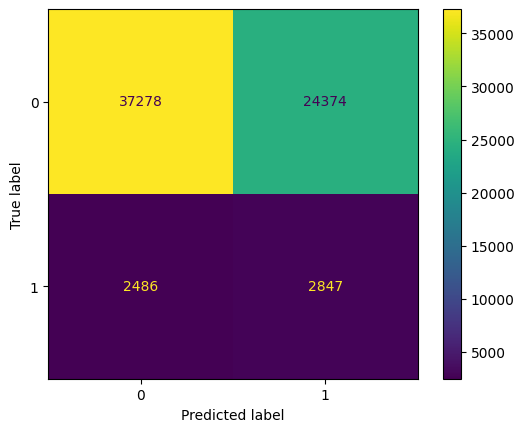

{'C': 1e-05, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report, precision_score, f1_score, recall_score, confusion_matrix, roc_auc_score

def evaluation(model):
    Y_pred = model.predict(X_test)
    Y_pred_train = model.predict(X_train_os)
    
    print('Evalation Matrix:\n')
    print('Accuracy Test:', accuracy_score(y_test, Y_pred).round(3))
    print('Accuracy Train:', accuracy_score(y_train_os, Y_pred_train).round(3))
    print('----------' * 6)
    print('AUC Score Test:', roc_auc_score(y_test, Y_pred).round(3))
    print('AUC Score Train:', roc_auc_score(y_train_os, Y_pred_train).round(3))
    print('----------' * 6)
    print('Classification Report:\n', classification_report(y_test, Y_pred))
    print('----------' * 6)
    print('Confusion Matrix:\n')
    cm = confusion_matrix(y_test, Y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    #print('Confusion Matrix:\n', confusion_matrix(Ytest, Y_pred))

model_lr = LogisticRegression(penalty='l2', solver='lbfgs', C=0.00001, random_state=42) #'newton-cg','sag', 'saga', C=0.00001
model_lr.fit(X_train_os, y_train_os)
evaluation(model_lr)
print(model_lr.get_params(deep=True))

c:\Users\hardi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


Evalation Matrix:

Accuracy Test: 0.777
Accuracy Train: 0.705
------------------------------------------------------------
AUC Score Test: 0.573
AUC Score Train: 0.705
------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87     61652
           1       0.13      0.33      0.19      5333

    accuracy                           0.78     66985
   macro avg       0.53      0.57      0.53     66985
weighted avg       0.87      0.78      0.82     66985

------------------------------------------------------------
Confusion Matrix:



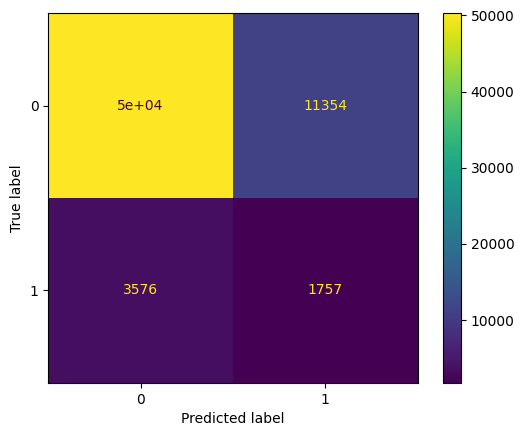

In [44]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='auto',min_samples_split=10, random_state=42)
model_dt.fit(X_train_os, y_train_os)
evaluation(model_dt)

In [46]:
model = {'Model Name':['Logistic Regression', 'Decision Tree'], 'Accuracy':[0.599,0.777], 
     'Roc_Auc':[0.569,0.573], 'The Best Model':['Not The Best', 'The Best']}
evaluasi = pd.DataFrame(model).set_index('Model Name')
evaluasi

,Accuracy,Roc_Auc,The Best Model
Model Name,,,
Logistic Regression,0.599,0.569,Not The Best
Decision Tree,0.777,0.573,The Best
